In [4]:
def Print_values(a: int, b: int, c: int):
    def emit(x, y, z):                #比较[a,b,v]
        val = x + y - 10 * z
        print(f"[{x}, {y}, {z}] -> {val}")
        return val

    if a > b:
        if b > c:
            return emit(a, b, c)      # [a, b, c]
        else:
            if a > c:
                return emit(a, c, b)  # [a, c, b]
            else:
                return emit(c, a, b)  # [c, a, b]
    else:
        if b > c:
            if a > c:
                return emit(a, c, b)  # [a, c, b]
            else:
                return emit(c, a, b)  # [c, a, b]
        else:
            return emit(c, b, a)      # [c, b, a]
Print_values(5,15,10)

[15, 10, 5] -> -25


-25

In [5]:
def F(x):
    # 计算单个 x 的 F(x)
    res = 1          # 因为最后一定会到 1，且 F(1) = 1
    while x > 1:
        res += 2 * x
        x = (x + 2) // 3   # 这是整数版的 ceil(x/3)
    return res

def compute_F_values(nums):
    # 对列表里的每个 x 计算 F(x)
    result = []
    for x in nums:
        result.append(F(x))
    return result
if __name__ == "__main__":
    
    nums = [1, 2, 3, 4, 10, 27, 28]
    print("输入：", nums)
    print("输出：", compute_F_values(nums))

输入： [1, 2, 3, 4, 10, 27, 28]
输出： [1, 5, 7, 13, 33, 79, 89]


In [34]:
def Find_number_of_ways(x:int)->int:     #3.1
    n,faces=10,6
    max_sum = n * faces
    dp = [0] * (max_sum + 1)
    dp[0] = 1  # 0个骰子时只有1种得到和0的方法
    for _ in range(n):  # add one die at a time
        new_dp = [0] * (max_sum + 1)
        for s in range(max_sum + 1):
            ways = dp[s]
            if ways == 0:
                continue
            for face in range(1, faces + 1):
                if s + face <=max_sum:
                    new_dp[s + face] += ways
        dp = new_dp

    return dp[x]
# 计算所有x=10~60的组合数               #3.2
Number_of_ways = [Find_number_of_ways(x) for x in range(10, 61)]

# 找出最大值及其对应的x
max_value = max(Number_of_ways)
max_index = Number_of_ways.index(max_value)
max_x = 10 + max_index

print("Number_of_ways =", Number_of_ways)
print(f"x = {max_x} gives the maximum number of ways = {max_value}")  

Number_of_ways = [1, 10, 55, 220, 715, 2002, 4995, 11340, 23760, 46420, 85228, 147940, 243925, 383470, 576565, 831204, 1151370, 1535040, 1972630, 2446300, 2930455, 3393610, 3801535, 4121260, 4325310, 4395456, 4325310, 4121260, 3801535, 3393610, 2930455, 2446300, 1972630, 1535040, 1151370, 831204, 576565, 383470, 243925, 147940, 85228, 46420, 23760, 11340, 4995, 2002, 715, 220, 55, 10, 1]
x = 35 gives the maximum number of ways = 4395456


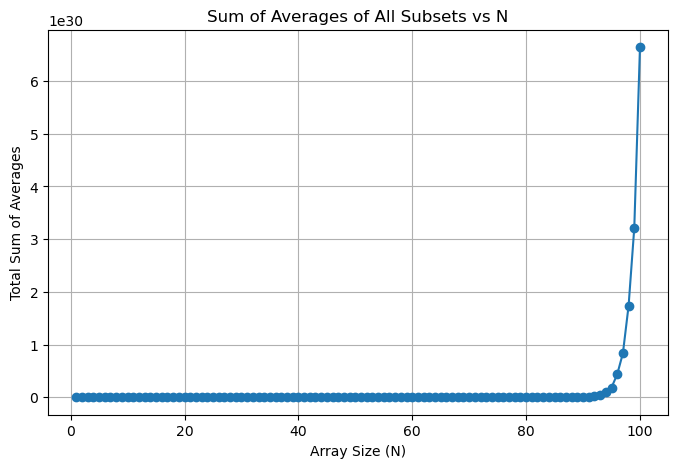

In [19]:
%matplotlib inline
import random  

def Random_integer(N):    #4.1
    arr = [random.randint(0, 10) for _ in range(N)]
    return arr
    
import itertools   #Chatgpt   
import math
def Sum_averages(arr):   #4.2
    total = 0
    n = len(arr)
    #nums = Random_integer(10)   #test
    #print(nums)  
    coeff = sum(math.comb(n - 1, k - 1) / k for k in range(1, n + 1))
    return sum(arr) * coeff 
#print(Sum_averages([1, 2, 3])) #test

import matplotlib.pyplot as plt   #4.3

Total_sum_averages = []
for N in range(1, 101):
    arr = Random_integer(N)
    total = Sum_averages(arr)
    Total_sum_averages.append(total)

plt.figure(figsize=(8,5))
plt.plot(range(1, 101), Total_sum_averages, marker='o')
plt.title("Sum of Averages of All Subsets vs N")
plt.xlabel("Array Size (N)")
plt.ylabel("Total Sum of Averages")
plt.grid(True)
plt.show()

In [37]:
import random

def create_matrix(N, M):   #5.1
    matrix = [[random.randint(0, 1) for _ in range(M)] for _ in range(N)]
    matrix[0][0] = 1
    matrix[N-1][M-1] = 1
    return matrix


def count_paths(matrix):  #5.2
    N = len(matrix)
    M = len(matrix[0])
    
    # Initialize dp table
    dp = [[0]*M for _ in range(N)]
    
    # Start if top-left cell is open
    if matrix[0][0] == 1:
        dp[0][0] = 1
    else:
        return 0  # no path from start
    
    # Fill dp table
    for i in range(N):
        for j in range(M):
            if matrix[i][j] == 0:
                dp[i][j] = 0
            else:
                if i > 0:
                    dp[i][j] += dp[i-1][j]
                if j > 0:
                    dp[i][j] += dp[i][j-1]
    
    return dp[N-1][M-1]

N, M = 10, 8       #5.3
runs = 1000
total_paths = 0

for _ in range(runs):
    mat = create_matrix(N, M)
    total_paths += count_paths(mat)

mean_paths = total_paths / runs
print(f"Mean number of paths over {runs} runs: {mean_paths:.4f}")


Mean number of paths over 1000 runs: 0.2720
